# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nplin

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [2]:
A_list = []
b_list = []
m_list = [10, 20, 50, 100, 1000]

for m in m_list:
    A, b = main.random_matrix_Ab(m)
    A_list.append(A)
    b_list.append(b)

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

In [3]:
# Podpunkt 1

ans_list = []

for i in range(len(m_list)):
    ans_list.append(nplin.solve(A_list[i], b_list[i]))

# Podpunkt 2

for i in range(len(m_list)):
    print('Norma dla rozwiązania równania macierzy ', m_list[i], 'x', m_list[i], ' wynosi: ', \
          main.residual_norm(A_list[i], ans_list[i], b_list[i]))

# Podpunkt 3

print('\n')
for i in range(len(m_list)):
    print('Uwarunkowanie macierzy ', m_list[i], 'x', m_list[i], ' wynosi: ', nplin.cond(A_list[i]))

Norma dla rozwiązania równania macierzy  10 x 10  wynosi:  2.278173318171838e-13
Norma dla rozwiązania równania macierzy  20 x 20  wynosi:  3.4642146554372475e-13
Norma dla rozwiązania równania macierzy  50 x 50  wynosi:  9.909460403165834e-13
Norma dla rozwiązania równania macierzy  100 x 100  wynosi:  5.386738778395548e-12
Norma dla rozwiązania równania macierzy  1000 x 1000  wynosi:  2.2788872906339397e-10


Uwarunkowanie macierzy  10 x 10  wynosi:  65.00589507444754
Uwarunkowanie macierzy  20 x 20  wynosi:  215.64088914446694
Uwarunkowanie macierzy  50 x 50  wynosi:  1202.3769975338698
Uwarunkowanie macierzy  100 x 100  wynosi:  1835.8368403034426
Uwarunkowanie macierzy  1000 x 1000  wynosi:  903658.9420333303


##### Podpunkt 4:

Rozmiary macierzy mają wpływ na normę rozwiązania, co możemy zaobserwować w podpunkcie 2. Może to wynikać z błędów zaokrągleń przy obliczeniach, które się kumulują wraz z rozmiarem macierzy. W podpunkcie 3. można zobaczyć, że uwarunkowanie macierzy także rośnie wraz z jej rozmiarem. Wynika to z jej definicji, w której mnoży się normy danej macierzy z macierzą odwrotną. Stąd wynika, że podczas określania tego, czy macierz jest dobrze uwarunkowania, czy nie, nie należy się sugerować dużą wartością wyninku w oderwaniu od rozmiaru macierzy.

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [4]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




In [8]:
restoreA_norm = []
restoreA_low = []
restoreA_gre = []

restore_ans_norm = []
restore_ans_low = []
restore_ans_gre = []

for i in range(len(m_list)):
    # Rekonstrukcja macierzy dla różnych wektorów singularnych
    restoreA_norm.append(main.create_matrix_from_A(A_list[i], main.log_sing_value(len(A_list[i][0]), 1, 10)))
    restoreA_low.append(main.create_matrix_from_A(A_list[i], main.order_sing_value(len(A_list[i][0]), 10, 'low')))
    restoreA_gre.append(main.create_matrix_from_A(A_list[i], main.order_sing_value(len(A_list[i][0]), 10, 'gre')))
    
    # Rozwiązanie układu równań dla zrekonstruowanej macierzy
    restore_ans_norm.append(nplin.solve(restoreA_norm[i], b_list[i]))
    restore_ans_low.append(nplin.solve(restoreA_low[i], b_list[i]))
    restore_ans_gre.append(nplin.solve(restoreA_gre[i], b_list[i]))

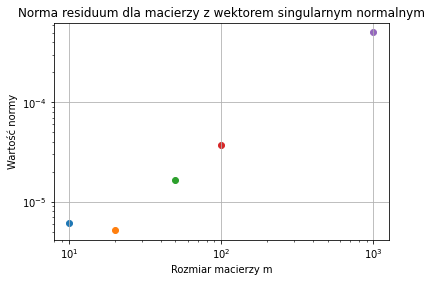

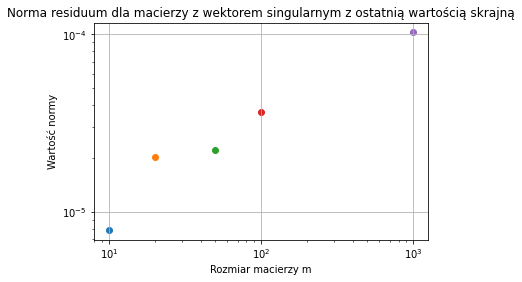

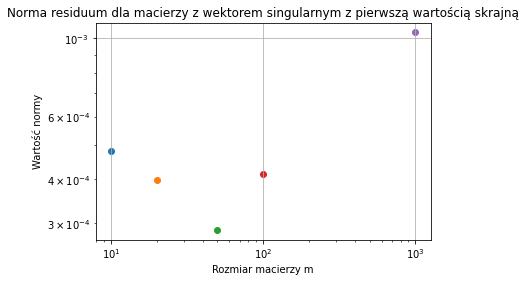

In [9]:
# Wykresy normy residuów    
    
for i in range(len(m_list)):
    plt.scatter(m_list[i], main.residual_norm(restoreA_norm[i], restore_ans_norm[i], b_list[i]))
plt.title('Norma residuum dla macierzy z wektorem singularnym normalnym')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Wartość normy')
plt.grid()
plt.loglog()
plt.show()

for i in range(len(m_list)):
    plt.scatter(m_list[i], main.residual_norm(restoreA_low[i], restore_ans_low[i], b_list[i]))
plt.title('Norma residuum dla macierzy z wektorem singularnym z ostatnią wartością skrajną')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Wartość normy')
plt.grid()
plt.loglog()
plt.show()  

for i in range(len(m_list)):
    plt.scatter(m_list[i], main.residual_norm(restoreA_gre[i], restore_ans_gre[i], b_list[i]))
plt.title('Norma residuum dla macierzy z wektorem singularnym z pierwszą wartością skrajną')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Wartość normy')
plt.grid()
plt.loglog()
plt.show()

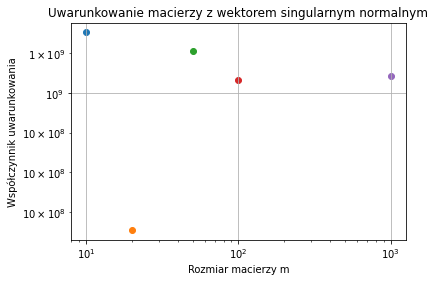

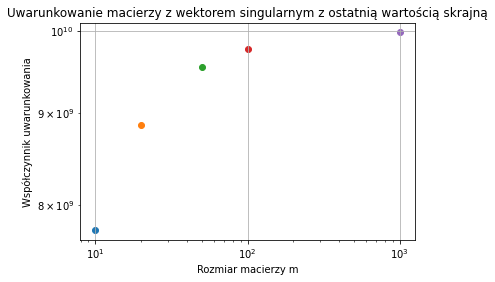

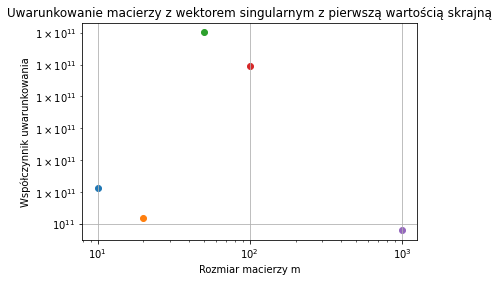

In [10]:
# Wykresy funkcji uwarunkowania macierzy

for i in range(len(m_list)):
    plt.scatter(m_list[i], nplin.cond(restoreA_norm[i]))
plt.title('Uwarunkowanie macierzy z wektorem singularnym normalnym')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Współczynnik uwarunkowania')
plt.grid()
plt.loglog()
plt.show()

for i in range(len(m_list)):
    plt.scatter(m_list[i], nplin.cond(restoreA_low[i]))
plt.title('Uwarunkowanie macierzy z wektorem singularnym z ostatnią wartością skrajną')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Współczynnik uwarunkowania')
plt.grid()
plt.loglog()
plt.show()

for i in range(len(m_list)):
    plt.scatter(m_list[i], nplin.cond(restoreA_gre[i]))
plt.title('Uwarunkowanie macierzy z wektorem singularnym z pierwszą wartością skrajną')
plt.xlabel('Rozmiar macierzy m')
plt.ylabel('Współczynnik uwarunkowania')
plt.grid()
plt.loglog()
plt.show()

##### Podpunkt 4.

Nie, nie musimy obliczać całej macierzy, ponieważ w obecnej sytuacji mamy jej wartości singularne. To sprawia, że możemy wyznaczyć współczynnik uwarunkowania dzieląc największą wartość singularną przez najmniejszą.


##### Wnioski:

Na tym laboratorium zapoznamiśmy się z najprostszym sposobem rozwiązywania równań macierzowo, gdzie ilość równań jest równa ilości niewiadomych. Omówiliśmy zagadnienie dekompozycji macierzy na wartości singularne, która jest bardzo podobna do diagonalizacji macierzy, tylko działa na miacierzach prostokątnych. Razem z tymi obliczeniami określaliśmy normy macierzy, które mówią nam o tym jak maksymalnie macierz wpływa na wektor oraz uwarunkowanie macierzy mówiące nam o błędach występujących w danym rozwiązaniu numerycznym problemu. Są to ważne informacje potrzebne wszędzie tam, gdzie korysta się z algebry liniowej w programowaniu (np. grafice gier).

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)